# Ordenamiento

El ordenamiento de arreglos corresponde a encontrar una permutación tal que cada elemento sea menor a su sucesor. 

In [2]:
def selection_sort(collection):
    length = len(collection)
    for i in range(length):
        least = i
        for k in range(i + 1, length):
            if collection[k] < collection[least]:
                least = k
        collection[least], collection[i] = (collection[i], collection[least])
    return collection

def insertion_sort(collection):
    for index in range(1, len(collection)):
        while 0 < index and collection[index] < collection[index - 1]:
            collection[index], collection[index - 1] = collection[index - 1], collection[index]
            index -= 1
    return collection

In [3]:
import numpy as np
import time

def gen_random(size):
    return np.random.permutation(np.arange(size,dtype=np.int8))

def gen_reverse(size):
    return np.arange(size,-1,-1,dtype=np.int8)

arr=gen_reverse(100)

start=time.clock()
insertion_sort(arr.copy())
end=time.clock()
t1=end-start

start=time.clock()
selection_sort(arr.copy())
end=time.clock()
t2=end-start



print('Insertion Sort: %2f'%t1)
print('Selection Sort : %2f'%t2)


Insertion Sort: 0.002992
Selection Sort : 0.001263


In [6]:
def mergesort(A):
    n=len(A)
    if len(A) <= 1:
      return A
    L = mergesort(A[0:n/2])
    R = mergesort(A[n/2:n])
    return merge(L, R)

def merge(L, R):
    result = []
    l_idx, r_idx = (0, 0)
    while l_idx < len(L) and r_idx < len(R):
      if L[l_idx] < R[r_idx]:
        result.append(L[l_idx])
        l_idx += 1
      else:
        result.append(R[r_idx])
        r_idx += 1
    result.extend(L[l_idx:len(L)])
    result.extend(R[r_idx:len(R)])
    return result

In [8]:
arr=gen_random(10)

sorted_arr=mergesort(arr)

print sorted_arr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
import pandas as pd
import sys

N=[50,100,500,1000,5000]
n_samp=20

s_n=[]
t_i=[]
t_m=[]

for i in N:
    for j in range(n_samp):
        s_n.append(i)
        arr=gen_random(i)
        start=time.clock()
        ins_arr=insertion_sort(arr.copy())
        end=time.clock()
        t_i.append(end-start)
        start=time.clock()
        merge_arr=mergesort(arr.copy())
        end=time.clock()
        t_m.append(end-start)        

        

In [41]:
data_insertion={'n':s_n,'time':t_i,'method':['insertion_sort']*len(s_n)}
df1=pd.DataFrame(data_insertion)
data_merge={'n':s_n,'time':t_m,'method':['merge_sort']*len(s_n)}
df2=pd.DataFrame(data_merge)
df=pd.concat([df1,df2],axis=0)
print df

            method     n      time
0   insertion_sort    50  0.000387
1   insertion_sort    50  0.000341
2   insertion_sort    50  0.000307
3   insertion_sort    50  0.000408
4   insertion_sort    50  0.000294
5   insertion_sort    50  0.000344
6   insertion_sort    50  0.000315
7   insertion_sort    50  0.000373
8   insertion_sort    50  0.000390
9   insertion_sort    50  0.000316
10  insertion_sort    50  0.000414
11  insertion_sort    50  0.000367
12  insertion_sort    50  0.000330
13  insertion_sort    50  0.000337
14  insertion_sort    50  0.000438
15  insertion_sort    50  0.000377
16  insertion_sort    50  0.000360
17  insertion_sort    50  0.000372
18  insertion_sort    50  0.000734
19  insertion_sort    50  0.000709
20  insertion_sort   100  0.002261
21  insertion_sort   100  0.001564
22  insertion_sort   100  0.001344
23  insertion_sort   100  0.001301
24  insertion_sort   100  0.001508
25  insertion_sort   100  0.001557
26  insertion_sort   100  0.001499
27  insertion_sort  

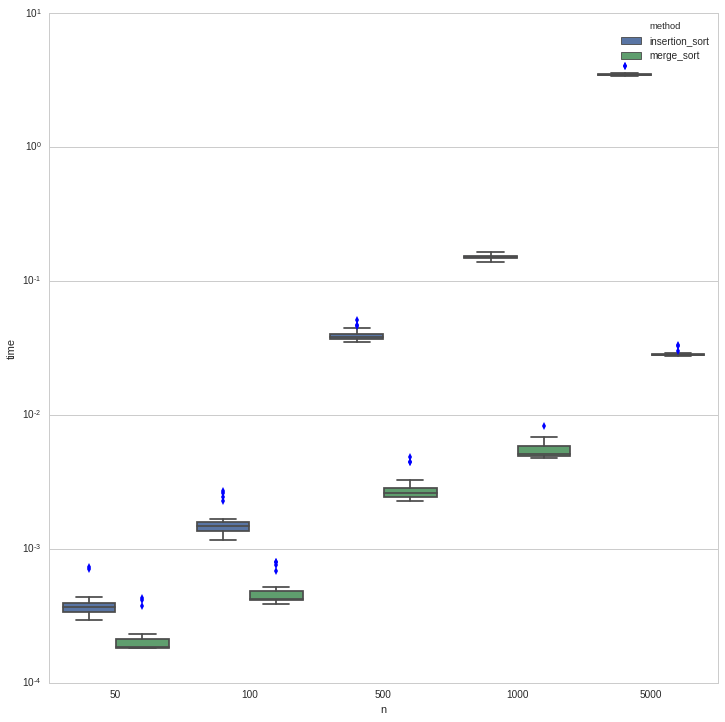

In [36]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 12))
ax.set( yscale="log")
sns.boxplot(x="n", y="time", hue="method",  data=df)
plt.show()

In [47]:
df.groupby(['method','n']).mean()


time
method         n             
insertion_sort 50    0.000396
               100   0.001646
               500   0.039655
               1000  0.151697
               5000  3.519845
merge_sort     50    0.000223
               100   0.000492
               500   0.002893
               1000  0.005477
               5000  0.028817

In [48]:
df.groupby(['method','n']).var()

time
method         n                 
insertion_sort 50    1.384287e-08
               100   2.116256e-07
               500   1.949114e-05
               1000  3.932651e-05
               5000  3.319561e-02
merge_sort     50    6.526411e-09
               100   2.030943e-08
               500   6.103782e-07
               1000  7.526957e-07
               5000  2.413984e-06